# NAREB Case: Connecting Black Intergenerational Families to Better Homes in King County, WA

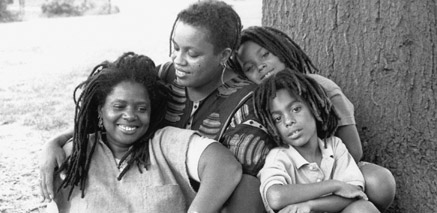

* Beau Morton 
* Part Time: 60 Weeks
* Estimated Finish: Dec 2022 
* Instructor name: Claude Fried

## Business Case 

The focus of this case is on the growth and betterment of Black families in King County, Washington. 

Client: National Association for Real Estate Brokers (NAREB) A black led organization that focuses on bringing together the minority professionals in the real estate industry to promote the meaningful exchange of ideas about our business and how best to serve their clientele. For this case the clientele will focus on black intergenerational families.

How can home renovations increase the estimated value of homes for black families in King County, WA? (specifically focusing on intergenerational homes)

## Data Understanding 

### We begin by importing pandas, numpy, ols, plt, sns, durbin_watson, and statsmodels to analyze our data and perform our regressions. We also import our data as df. 

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
import statsmodels.api as sm 
%matplotlib inline

df = pd.read_csv('data/kc_house_data.csv')
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### In this analysis, we will perform multi-linear regression. We start by observing our columns to better understand what independent variables to analyze with price for our client. 

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# First Iteration

### The first model iteration for our case will focus on square foot living, square foot above, and bathrooms. Before we can get to the analysis, we will drop 'zipcode' as a variable, because the numbers in zipcode are not useful to us in this analysis without context of what each zipcode means. 

In [4]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [5]:
df.drop(['zipcode'], axis =1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,47.5345,-122.069,1410,1287


### Here we will convert our categorical data into something more useful for us in this analysis. 

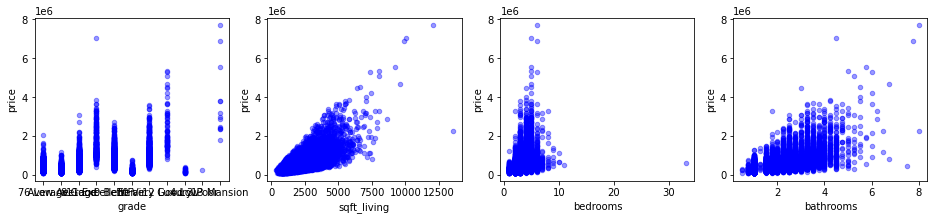

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_living', 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

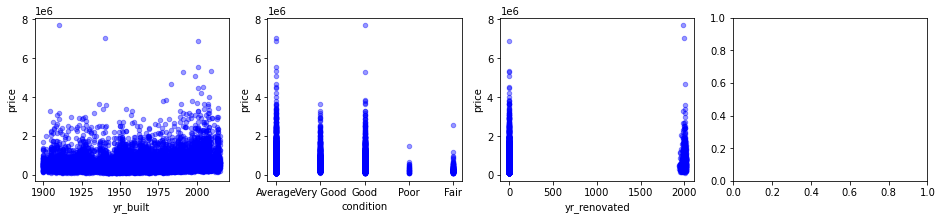

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

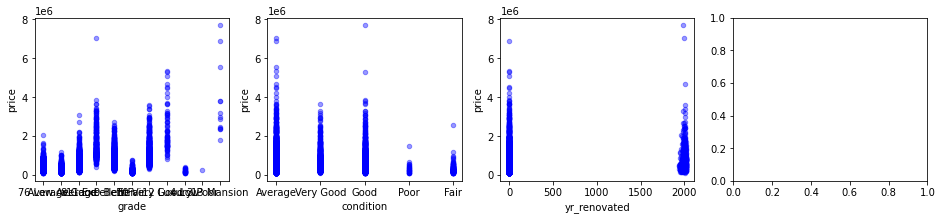

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['grade', 'condition', 'yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

### Here we create dummy variables for the variables that are considered categorical

grd_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
ren_dummies = pd.get_dummies(df['yr_renovated'], prefix='yr_ren', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

In [9]:
data = df.drop(['grade','yr_renovated','condition'], axis=1)

## Regression Model 1

### Here we are going to generate our first regression model. 

In [10]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_above', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     7003.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:05:52   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21593   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.815e+04   5252.893     -7.262      

### When we look at our model, we can see that the model has generated have a lot of information that is useful to us. Our R-squared will assess our goodness of fit, and in this model, we can see that there is a good fit - 0.493 is a moderatly good fit, with 1 being a perfect fit. 


### Our p value shows that square foot living and square foot above show no random chance in our analysis, however bathrooms shows some random chance - bathrooms may not be a good variable for this analysis moving forward. 

### We can also see that there is a positive correlation between square foot living and price. As square foot living increases so does price. We can also see that as square foot above increases price decreases, as does bathroom size. 

## Heteroscadasticity

In [11]:
durbin_watson(model.resid)

1.9820081447233575

### We will use the Durbin-Watson score to check for homoskedasticity. This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5. This model shows that there is homoskedasticity in our model.

### Multicolliniarity

In [64]:
data_pred.corr()

,bathrooms,sqft_living,sqft_above
bathrooms,1.000000,0.755758,0.686668
sqft_living,0.755758,1.000000,0.876448
sqft_above,0.686668,0.876448,1.000000


In [65]:
abs(data_pred.corr()) > 0.70

,bathrooms,sqft_living,sqft_above
bathrooms,True,True,False
sqft_living,True,True,True
sqft_above,False,True,True


### The normality assumption states that the model residuals should follow a normal distribution. This model does not follow a normal distribution. We will not continue our test for normality, because there is a high correlation between bathrooms and square foot living, and square foot above and square foot living

# Second Iteration

In [14]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### In this second iteration, we will keep square foot living from our first iteration, and analyze bedrooms and floors. These could be useful to our clients trying to purchase new homes. 

In [15]:
data_pred = df[['bedrooms','sqft_living','floors']]
data_pred.head()

,bedrooms,sqft_living,floors
0,3,1180,1.0
1,3,2570,2.0
2,2,770,1.0
3,4,1960,1.0
4,3,1680,1.0


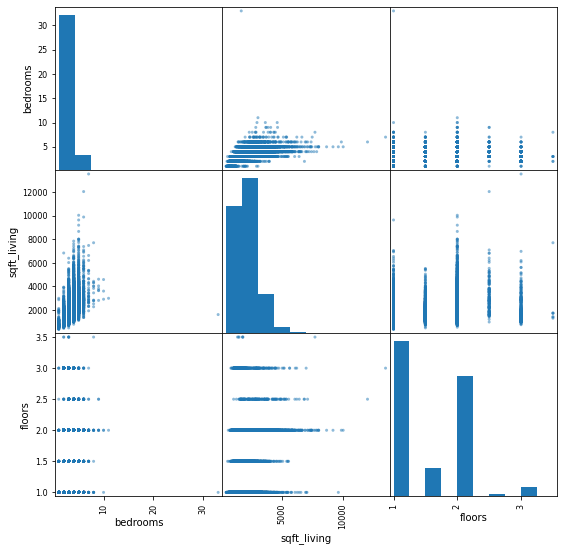

In [16]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

## Regression Model 2

In [17]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'floors']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7398.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:05:53   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.704e+04   7684.108     10.026      

### In this model our R-squared is 0.507, which has a better line of fit than the last model we saw. We can see as price increases, number of bedrooms increases, while square foot living and number of floors increases. In this iteration, floors has some random chance (more than bathrooms in the previous model). 

## Normality

In [18]:
model.resid

0        -55683.444397
1       -179284.065564
2        -26664.574613
3        139380.455651
4         75501.379701
             ...      
21592    -34376.931849
21593   -177936.599640
21594    113502.405276
21595    -12868.624315
21596     36401.405276
Length: 21597, dtype: float64

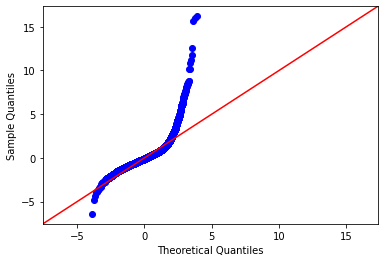

In [19]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True);

## Heteroscadasticity

In [20]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9853845320662582

### There is an acceptable level of homoscadascity in this second iteration

### Multicolliniarity 

In [21]:
data_pred.corr()

,bedrooms,sqft_living,floors
bedrooms,1.000000,0.578212,0.177944
sqft_living,0.578212,1.000000,0.353953
floors,0.177944,0.353953,1.000000


In [22]:
abs(data_pred.corr()) > 0.70

,bedrooms,sqft_living,floors
bedrooms,True,False,False
sqft_living,False,True,False
floors,False,False,True


### As we can see, there all correlations are below 0.7, which is acceptable. 

# Third Iteration

In [23]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [24]:
data_pred = df[['bedrooms','bathrooms','sqft_lot']]
data_pred.head()

,bedrooms,bathrooms,sqft_lot
0,3,1.00,5650
1,3,2.25,7242
2,2,1.00,10000
3,4,3.00,5000
4,3,2.00,8080


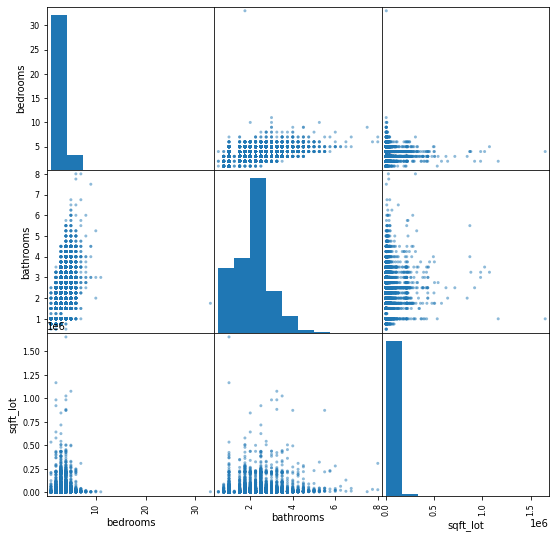

In [25]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

## Regression Model Three

In [26]:
outcome = 'price'
x_cols = ['bedrooms', 'sqft_living', 'sqft_lot']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7451.
Date:                Tue, 19 Apr 2022   Prob (F-statistic):               0.00
Time:                        09:05:54   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.424e+04   6637.291     12.692      

### In this third iteration, we can see we have the best line of fit (0.509), and can also see that there is zero random chance with all three variables in our model. 

## Multicollinarity 

In [27]:
data_pred.corr()

,bedrooms,bathrooms,sqft_lot
bedrooms,1.000000,0.514508,0.032471
bathrooms,0.514508,1.000000,0.088373
sqft_lot,0.032471,0.088373,1.000000


In [28]:
abs(data_pred.corr()) > 0.70

,bedrooms,bathrooms,sqft_lot
bedrooms,True,False,False
bathrooms,False,True,False
sqft_lot,False,False,True


### There is a low correlation between these variables. 

## Heteroscadasticity




In [38]:
durbin_watson(model.resid)

1.9852564749730714

## Normality

In [29]:
model.resid

0        -57396.555138
1       -183584.365862
2        -26568.641409
3        135504.643914
4         72321.647756
             ...      
21592    -32556.713113
21593   -179704.237083
21594    112546.289860
21595    -14377.462020
21596     35339.879152
Length: 21597, dtype: float64

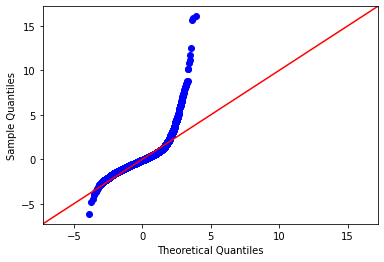

In [41]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True);

## Conclusion

### The third model has showed square foot lots, square foot living spaces, and bedrooms spaces were good variables to further analyse as factors to improve quality of life and renovation value for intergenerational black families in King County, WA. When we look at bedrooms, square foot living and square foot lots we can see that ther are many outliers that need to be dropped to get a clearer understanding of normality before moving forward. 

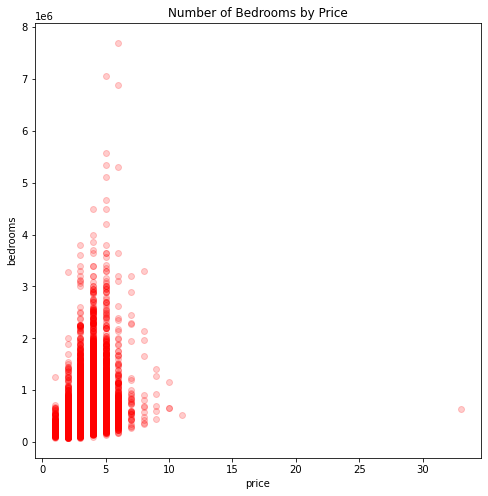

In [59]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df["bedrooms"], df["price"], color='r', alpha=0.2)
ax.set(title='Number of Bedrooms by Price', xlabel='price', ylabel='bedrooms');

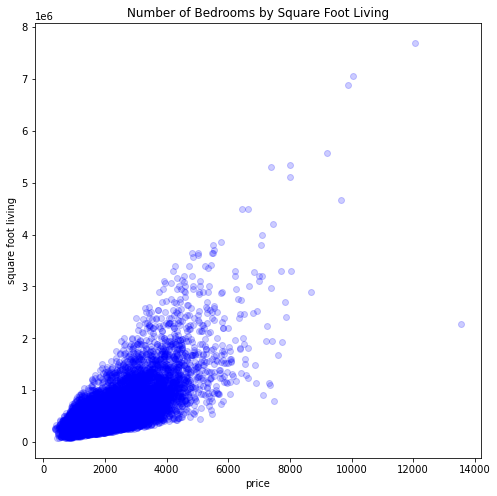

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df["sqft_living"], df["price"], color='b', alpha=0.2)
ax.set(title='Number of Square Foot Living by Price',xlabel='price', ylabel='square foot living');

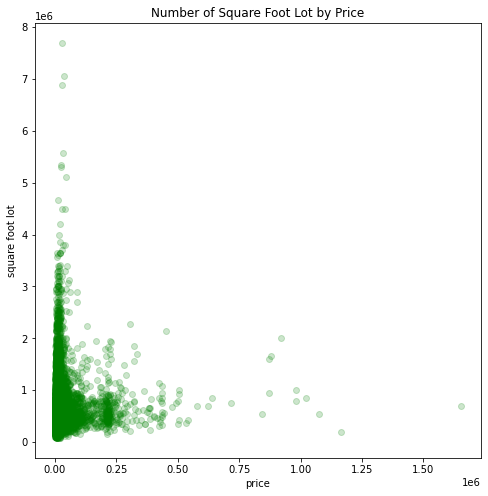

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df["sqft_lot"], df["price"], color='g', alpha=0.2)
ax.set(title='Number of Square Foot Lot by Price', xlabel='price', ylabel='square foot lot');

### Next Steps

### In the future, we as analysts should sharpen our focus on our normality testing, by dropping the outliers in this data. 

### I recommend continuing to explore square foot living space, square foot lot space, and bedrooms space as variables. They have the lowest random chance, they also offer the most opportunity for renovation in the future. I would also recommend, webscraping for public health data about what black families need as they grow intergenerational families. 
